<a href="https://colab.research.google.com/github/TariqAlhathloul/Time-Series/blob/main/WorkSpace/Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [366]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

## import libraries

In [422]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import tensorflow as tf

from scipy import stats

##  for reproducibility production

In [368]:
np.random.seed(93)
tf.random.set_seed(93)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

## Load the data.

In [369]:
df = pd.read_csv("/content/Traffic Data.csv")
# change date_time to datetime datatype.
df['full_date'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

## Sort values by the date

In [370]:
df = df.sort_values(by='full_date')

## set `date_time` as an index

In [371]:
df.set_index('date_time', inplace=True)

## information about the data

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   full_date            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.4+ MB


## head values

In [373]:
df.head(10)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,full_date
date_time,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,2016-11-18 16:00:00
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,2016-11-18 17:00:00
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist,2016-11-18 17:00:00
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Fog,fog,2016-11-18 17:00:00


## Summary statistics of the numerical attributes

In [374]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
traffic_volume,19980.0,3278.186887,113.0,1228.75,3430.0,4928.0,16781.0,1977.171357
temp,20000.0,281.16268,243.39,271.95,281.825,291.84,310.07,12.661288
rain_1h,20000.0,0.048395,0.0,0.0,0.0,0.0,10.6,0.398007
snow_1h,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
clouds_all,20000.0,49.3846,0.0,1.0,75.0,90.0,92.0,39.647341
full_date,20000,2017-10-22 04:13:17.939999744,2016-11-18 15:00:00,2017-04-30 14:45:00,2017-10-21 07:30:00,2018-04-13 21:00:00,2018-09-30 23:00:00,NaN


## Summary statistics of categorical attributes

In [375]:
df.describe(include='O')

,weather_main,weather_description
count,20000,20000
unique,10,34
top,Clear,sky is clear
freq,5614,5514


## convert `traffic_volume` to numpy array

In [376]:
traffic_volume = df['traffic_volume'].values

## plot traffic_volume of all time in the dataset

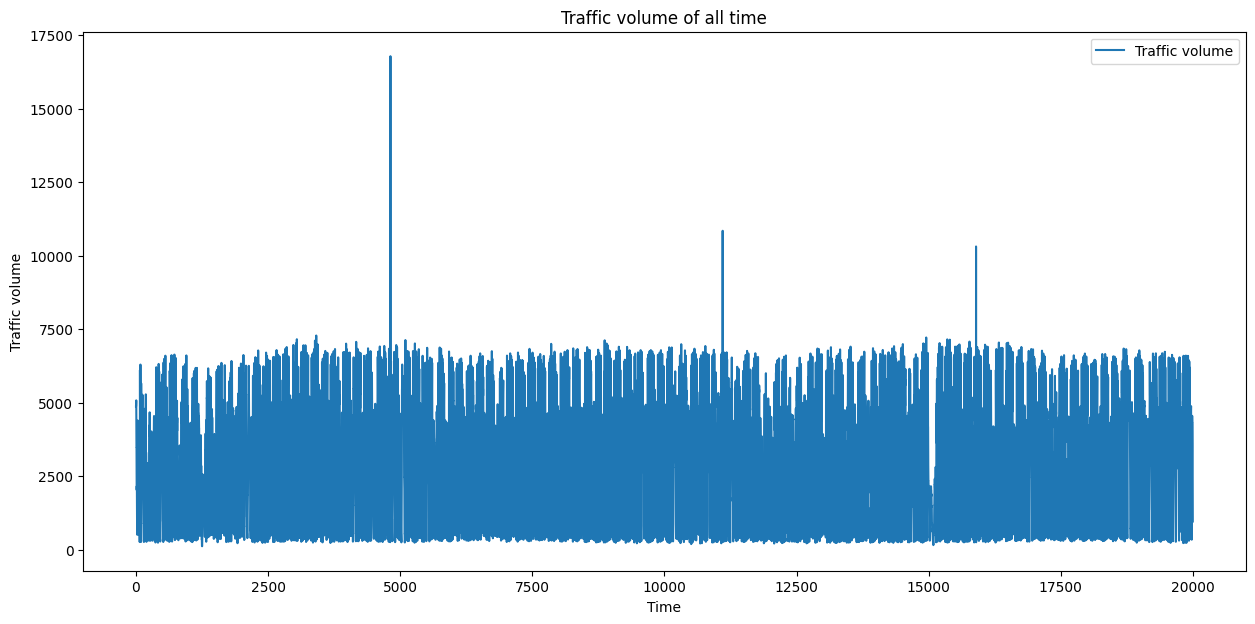

In [377]:
plt.figure(figsize=(15, 7))
plt.plot(traffic_volume)
plt.xlabel("Time")
plt.ylabel("Traffic volume")
plt.title("Traffic volume of all time")
plt.legend(["Traffic volume"])
plt.show()

## traffic volume for the first 100 instances in the dataset

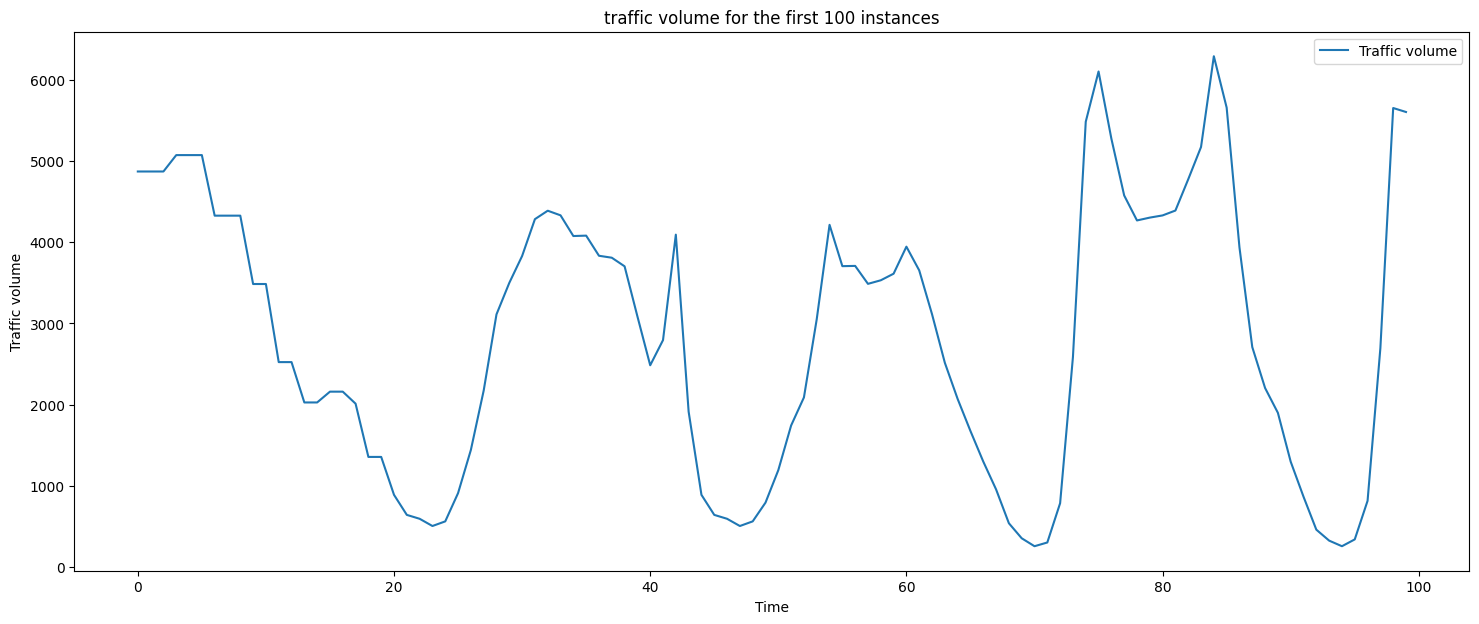

In [378]:
plt.figure(figsize=(18, 7))
plt.plot(traffic_volume[:100])
plt.xlabel("Time")
plt.ylabel("Traffic volume")
plt.title("traffic volume for the first 100 instances")
plt.legend(["Traffic volume"])
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

## check for missing values

In [379]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
full_date,0


## drop missing values

In [380]:
df = df.dropna()

## Check for duplicated values

In [381]:
df.duplicated().sum()

12

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19980 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       19980 non-null  float64       
 1   temp                 19980 non-null  float64       
 2   rain_1h              19980 non-null  float64       
 3   snow_1h              19980 non-null  float64       
 4   clouds_all           19980 non-null  int64         
 5   weather_main         19980 non-null  object        
 6   weather_description  19980 non-null  object        
 7   full_date            19980 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.4+ MB


## Apply ETS, (Error Trend Seasonality ).


In [383]:
result = seasonal_decompose(df['traffic_volume'].values, model='additive', period=7)

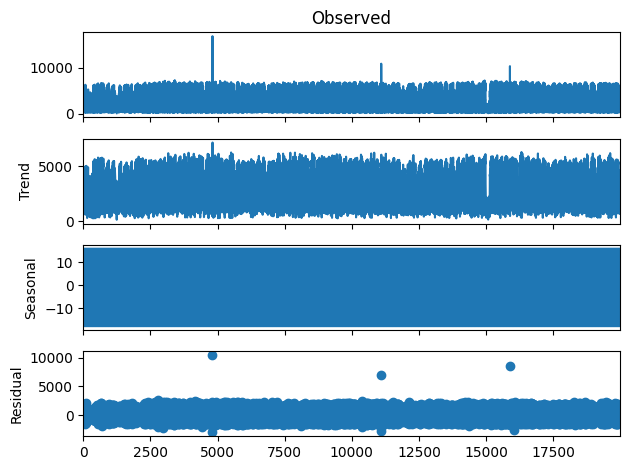

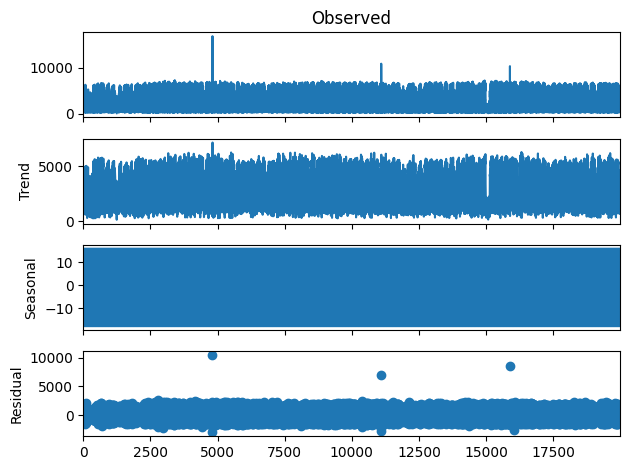

In [384]:
result.plot()

## Plot the result

Text(0.5, 1.0, 'Trend')

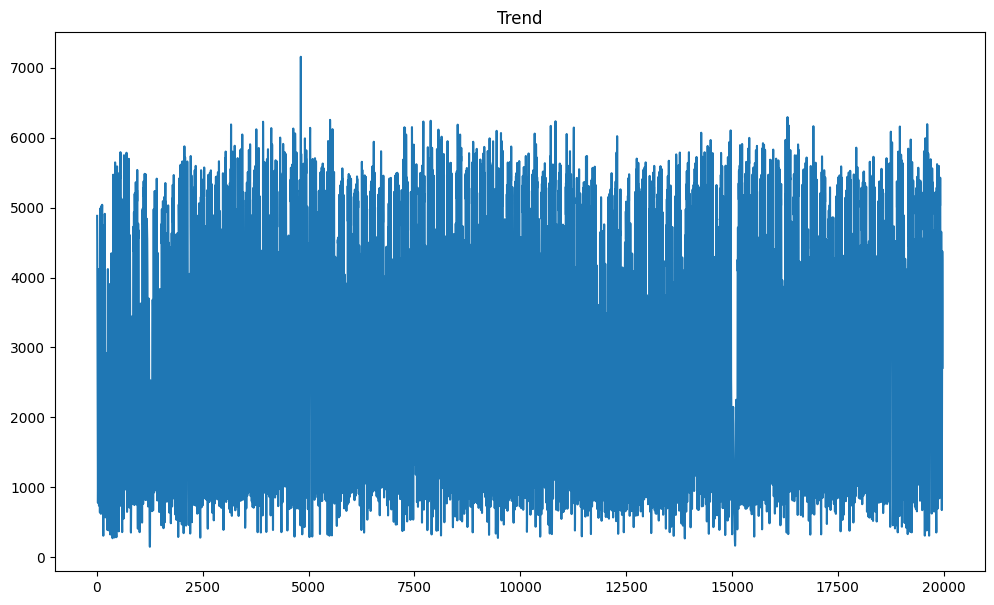

In [385]:
plt.figure(figsize=(12, 7))
plt.plot(result.trend)
plt.title("Trend")

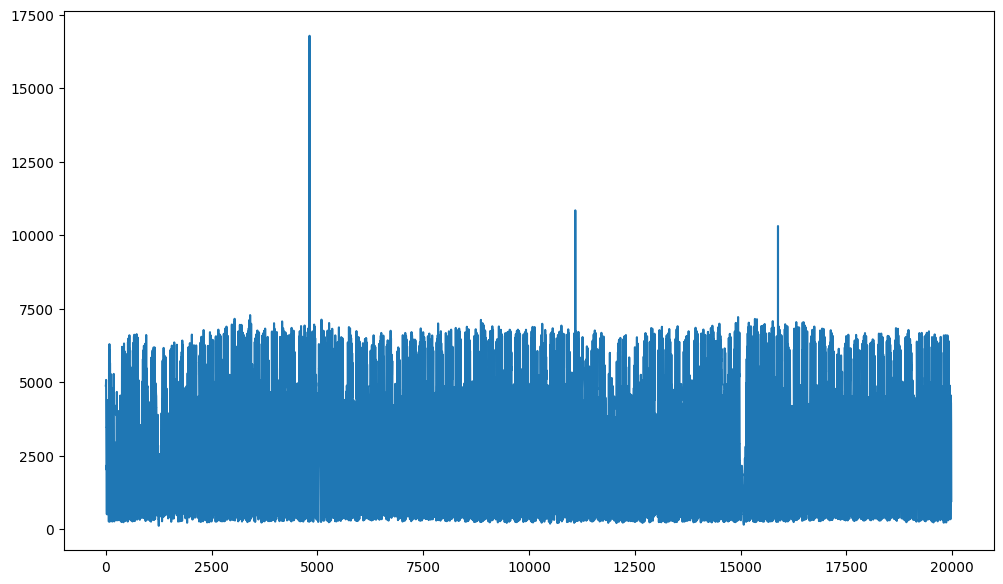

In [386]:
plt.figure(figsize=(12, 7))
plt.plot(result.observed)

## resid

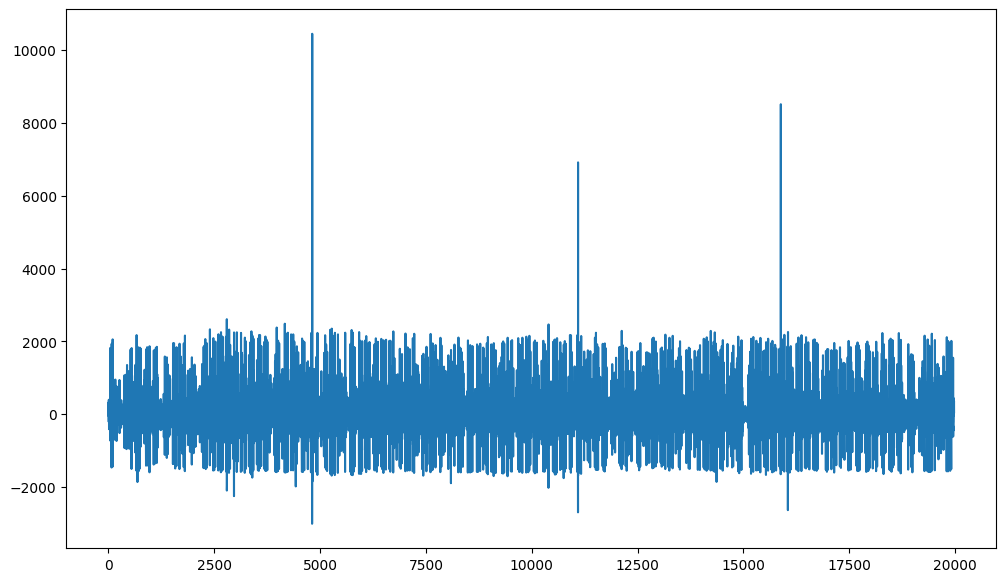

In [387]:
plt.figure(figsize=(12, 7))
plt.plot(result.resid)

## scatter plot

In [389]:
#df_c = df[['traffic_volume']]
#sns.scatterplot(data=df_c)

## boxplot

<Axes: xlabel='traffic_volume'>

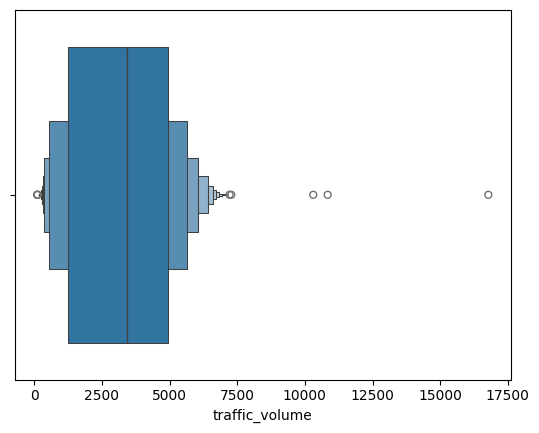

In [390]:
sns.boxenplot(data=df, x='traffic_volume')

## remove outliers

In [392]:
z = np.abs(stats.zscore(df['traffic_volume']))

threshold = 3
outliers = df[z > threshold]

df = df.drop(outliers.index)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


## Feature extraction

In [393]:
df['day_of_week'] = df['full_date'].dt.day_of_week
df['month'] = df['full_date'].dt.month
df['day_of_year'] = df['full_date'].dt.day_of_year

In [394]:
df.head().T

date_time,2016-11-18 15:00:00,2016-11-18 15:00:00,2016-11-18 15:00:00,2016-11-18 16:00:00,2016-11-18 16:00:00
traffic_volume,4872.0,4872.0,4872.0,5074.0,5074.0
temp,274.08,274.08,274.08,273.84,273.84
rain_1h,0.0,0.0,0.0,0.0,0.0
snow_1h,0.0,0.0,0.0,0.0,0.0
clouds_all,90,90,90,90,90
weather_main,Snow,Fog,Mist,Fog,Mist
weather_description,heavy snow,fog,mist,fog,mist
full_date,2016-11-18 15:00:00,2016-11-18 15:00:00,2016-11-18 15:00:00,2016-11-18 16:00:00,2016-11-18 16:00:00
day_of_week,4,4,4,4,4
month,11,11,11,11,11


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [397]:
13986 + 5994

19980

## function to prepare the data

In [398]:
def create_seq(data, time_steps):
  x, y = [], []
  for i in range(time_steps, len(data)):
    x.append(data[ i - time_steps: i,0])
    y.append(data[i,0])
  return np.array(x), np.array(y)

In [399]:
traffic_volume = df[['traffic_volume']]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [402]:
scaler = MinMaxScaler(feature_range=(0, 1))
traffic_volume_scaled = scaler.fit_transform(traffic_volume)

## create a sequence of 30 days a month

In [403]:
time_step=30
x, y = create_seq(data=traffic_volume_scaled, time_steps=time_step)

In [405]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [406]:
print(f"X train shape {X_train.shape}, X test shape {X_test.shape}")
print(f"y train shape {y_train.shape}, y test shape {y_test.shape}")

X train shape (13982, 30), X test shape (5963, 30)
y train shape (13982,), y test shape (5963,)


## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [407]:
import keras
from keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

## GRU Model

In [408]:
GRU_model = Sequential()


GRU_model.add(GRU(units=32, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], 1)))
GRU_model.add(GRU(units=32, recurrent_dropout=(0.2), activation='tanh'))
GRU_model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## model summary

In [409]:
GRU_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                          │ (None, 30, 32)              │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

## compile the model

In [410]:
GRU_model.compile(
    optimizer = 'RMSprop',
    loss='mean_squared_error'
)

## callbacks

In [411]:
call_backs = (
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint('Models/GRU_model.keras', save_best_only=1)
)

## fitting the model

In [362]:
GRU_history = GRU_model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    callbacks=call_backs
)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 0.0424
Epoch 2/50
  5/219 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0122

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0102
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0080
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0076
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 0.0073
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0072
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0071
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0070
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0069
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0067
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0066
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0065
Epoch 13/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.0063
Epoch 14/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0062
Epoch 15/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0061
Epoch 16/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 4

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

## Make predictions

In [363]:
predictions = GRU_model.predict(X_test)

187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


## inverse_transform the data to get it back to it's original state

In [364]:
#predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
#y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

## mean squared error

In [429]:
mean_squared_error(y_test, predictions)

0.004213345636376797

## Mean absolute percentage error

In [430]:
mean_absolute_percentage_error(y_test, predictions)

0.21814258615146817

## Plot predications

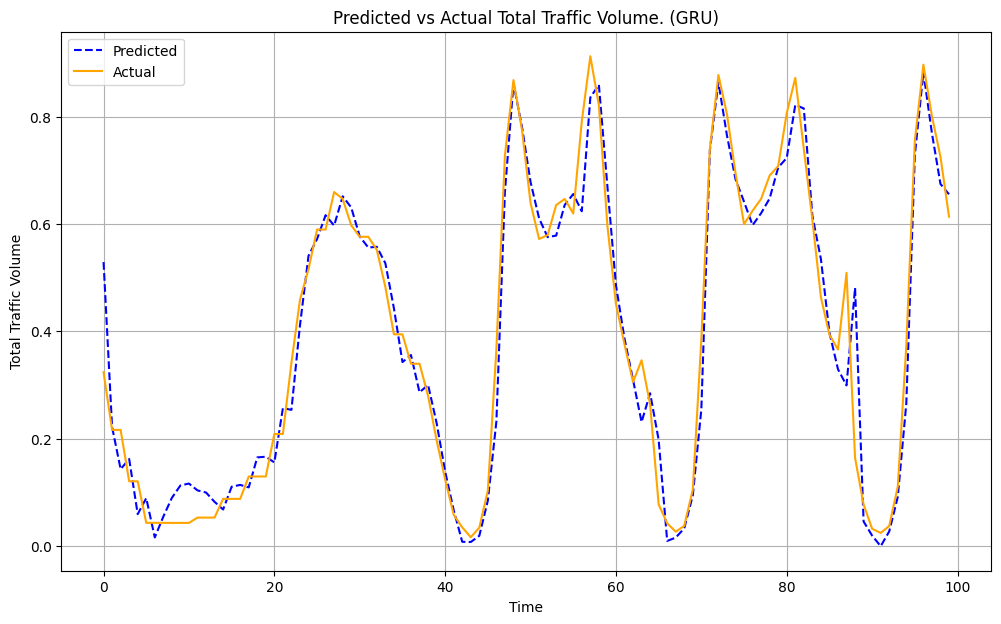

In [426]:
plt.figure(figsize=(12, 7))

plt.plot(predictions[:100], label='Predicted', color='blue', linestyle='--')
plt.plot(y_test[:100], label='Actual', color='orange')

plt.title('Predicted vs Actual Total Traffic Volume. (GRU)')
plt.xlabel('Time')
plt.ylabel('Total Traffic Volume')

plt.grid(True)

plt.legend(loc='best')

plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

## LSTM Model

In [413]:
LSTM_model = Sequential()

LSTM_model.add(LSTM(units=32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))

LSTM_model.add(LSTM(units=32, activation='relu'))

LSTM_model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Model summary

In [414]:
LSTM_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 32)              │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

## compile the model

In [420]:
LSTM_model.compile(
    optimizer = 'adam',
    loss='mean_squared_error'
)

## callbacks

In [416]:
call_backs = (
    EarlyStopping(monitor='loss', patience=10),
    ModelCheckpoint('Models/LSTM_model.keras', save_best_only=True)
)

## fitting the model

In [421]:
LSTM_history = LSTM_model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    callbacks=call_backs,
    verbose=1
)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.1081
Epoch 2/50
  6/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0243

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0273
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0084
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0073
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0067
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0064
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0061
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0059
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0057
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0056
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0056
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 0.0055
Epoch 13/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0054
Epoch 14/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0053
Epoch 15/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.0053
Epoch 16/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 34m

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

## make predictions

In [423]:
predictions_lstm = LSTM_model.predict(X_test)

187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

## Mean squared error

In [427]:
mean_squared_error(y_test, predictions_lstm)

0.003765352685439906

## Mean absolute percentage error

In [428]:
mean_absolute_percentage_error(y_test, predictions_lstm)

0.2596634555064519

## Plot predictions

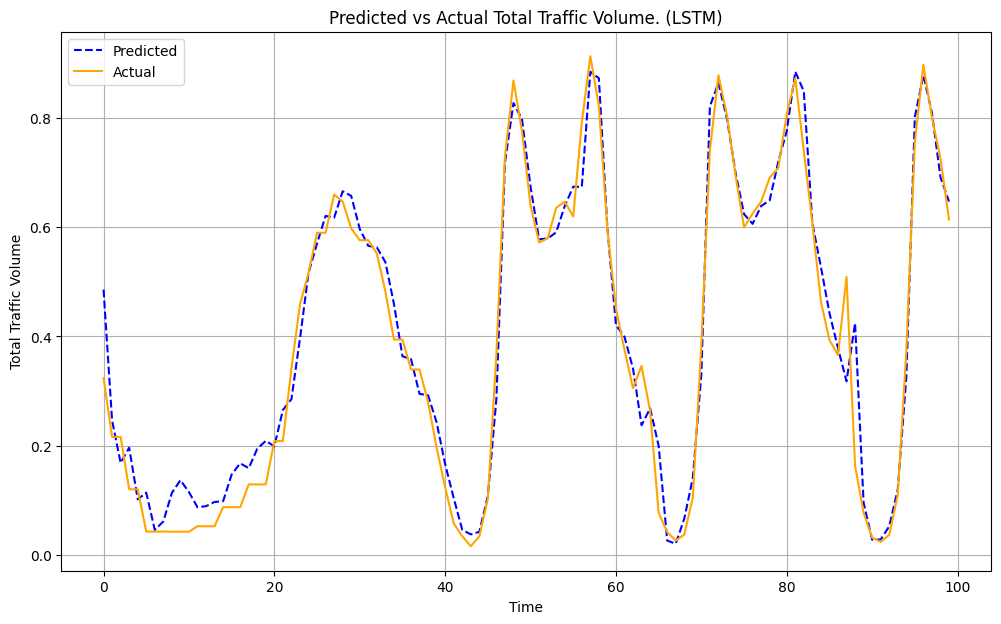

In [425]:
plt.figure(figsize=(12, 7))

plt.plot(predictions_lstm[:100], label='Predicted', color='blue', linestyle='--')
plt.plot(y_test[:100], label='Actual', color='orange')

plt.title('Predicted vs Actual Total Traffic Volume. (LSTM)')
plt.xlabel('Time')
plt.ylabel('Total Traffic Volume')

plt.grid(True)

plt.legend(loc='best')

plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: